# Transformers
Transformers in machine learning are used to preprocess data before training a model. They are part of the data preprocessing pipeline and help to convert the input data into a format that can be used by the model.

Transformers can perform a wide range of data preprocessing operations, such as scaling the data, converting categorical data to numerical data, handling missing values, and so on. They can also be used to create new features or transform existing features using mathematical functions such as logarithm, reciprocal, square, and square root.

Transformers are often used in combination with other machine learning techniques, such as feature selection, dimensionality reduction, and model selection. They help to improve the accuracy and performance of the model by ensuring that the input data is correctly formatted and optimized for the machine learning algorithm being used.

# Different Types of Function Transformers:
1. Log transformation: It is a statistical method used to transform data from its original scale to a logarithmic scale. In other words, it involves taking the logarithm of each data point.Log transformation is often used in data analysis and statistics to reduce the range of values and the influence of outliers. It can also be used to make the relationship between variables more linear, to stabilize variance, and to improve the normality of the distribution of data.

    The natural logarithm (ln) and base 10 logarithm (log10) are the most commonly used types of logarithmic transformations.

<hr>
<hr>

2. Reciprocal transformation: It is a mathematical transformation that involves taking the reciprocal (inverse) of each value in a dataset. In other words, if x is a value in the dataset, then the reciprocal of x is 1/x. This transformation is used in statistics and machine learning to create a more linear relationship between two variables, which can be useful for certain types of analyses.Reciprocal transformation is particularly useful when dealing with data that have a wide range of values, such as counts or measures of time. 

    In such cases, the transformation can help to reduce the influence of extreme values and make the data more normally distributed. This can make it easier to apply certain statistical techniques that assume a normal distribution, such as linear regression.One potential drawback of reciprocal transformation is that it can create negative values if any values in the original dataset are equal to or less than 0. Therefore, it is important to ensure that all values in the dataset are positive before applying this transformation.
    
<hr>
<hr>

3. Square transformation: It is a mathematical transformation applied to a numerical variable. It involves raising each value of the variable to the power of 2, i.e., x^2.Square transform is used to increase the separation between small values of a variable and reduce the separation between large values. It is often used to address non-linear relationships between variables. 

    For example, a scatter plot may show that the relationship between two variables is not linear but instead curves upwards or downwards. Applying a square transform to one or both variables can sometimes make the relationship linear, which can be useful for certain types of analysis or modeling.Additionally, square transform is sometimes used to reduce the impact of outliers in a variable. Since the effect of outliers is magnified by taking the square of each value, the resulting transformed variable may be more normally distributed and better suited for certain types of analysis or modeling.

<hr>
<hr>

4. Square root transformation: It is a data transformation method that involves taking the square root of each data point in a dataset. It is used to reduce the variability of the data, especially when the data has a non-linear relationship between the independent and dependent variables.

     Some common reasons for using the square root transformation include:

- To stabilize the variance of the data: When the variance of the data is not constant across the range of the independent variable, square root transformation can help to stabilize it.

- To linearize the relationship between variables: Square root transformation can help to linearize a non-linear relationship between the independent and dependent variables, making it easier to model the relationship using linear regression.

- To reduce the influence of extreme values: Square root transformation can reduce the impact of extreme values in the data, making the data more robust to outliers.

# Log Transformation

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats # Ued to plot QQ plot
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("train.csv", usecols=["Age", "Fare", "Survived"])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum() # Missing values

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df["Age"].fillna(df["Age"].mean(), inplace=True)  # Missing values filled with the mean value of that table

In [6]:
df["Age"].isnull().sum() 

0

In [7]:
df.sample(10)

,Survived,Age,Fare
874,1,28.000000,24.0000
308,0,30.000000,24.0000
373,0,22.000000,135.6333
143,0,19.000000,6.7500
814,0,30.500000,8.0500
65,1,29.699118,15.2458
825,0,29.699118,6.9500
69,0,26.000000,8.6625
857,1,51.000000,26.5500
880,1,25.000000,26.0000


In [8]:
X = df.drop("Survived", axis=1) # df.iloc[:, 1:]
y = df["Survived"] # df.iloc[:,0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

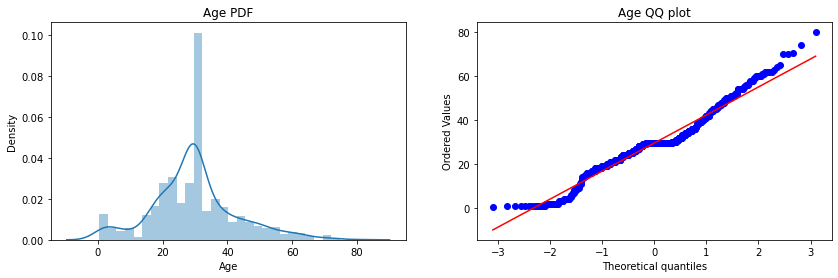

In [10]:
# Checking the 2 numerical columns either they are noramlly districuted or not.
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df["Age"])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Age"], dist="norm", plot=plt)
plt.title("Age QQ plot")

plt.show()

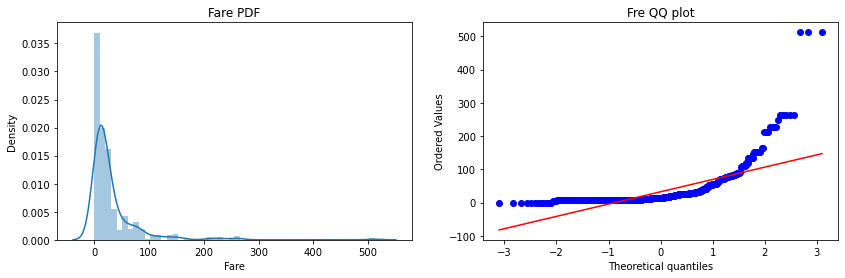

In [11]:
# FOr Fare column
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df["Fare"])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train["Fare"], dist="norm", plot=plt)
plt.title("Fre QQ plot")

plt.show() # this is completely right skwed which means log tranformation has to be applied

## Model performance wihtout log transformation

In [16]:

lr = LogisticRegression()
dt = DecisionTreeClassifier()

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)

print("The accuracy of Logistic Regression is:", accuracy_score(y_test, lr_pred)*100)
print("The accuracy of Decesion Tree is:", accuracy_score(y_test, dt_pred,)*100)

The accuracy of Logistic Regression is: 64.80446927374301
The accuracy of Decesion Tree is: 68.15642458100558


<hr>

## Model performance wiht log transformation

In [18]:
trf = FunctionTransformer(func=np.log1p) # if np.log is used it wont work on 0 

In [19]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [21]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

lr.fit(X_train_transformed, y_train)
dt.fit(X_train_transformed, y_train)

lr_pred = lr.predict(X_test_transformed)
dt_pred = dt.predict(X_test_transformed)

print("The accuracy of Logistic Regression after transformation is:", accuracy_score(y_test, lr_pred)*100)
print("The accuracy of Decesion Tree after transformation is:", accuracy_score(y_test, dt_pred,)*100)

The accuracy of Logistic Regression after transformation is: 68.15642458100558
The accuracy of Decesion Tree after transformation is: 67.59776536312849


You can see the logistic model is improved but the decision tree is not it is beacuse in some algos like decision tree the distribution of the data is not necessary

<hr>

In [25]:
# Cross val score to check wheather the improved accuracy from transforamtion is correct or not
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10))*100)
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10))*100)

LR 67.80274656679151
DT 65.77403245942571


<hr>

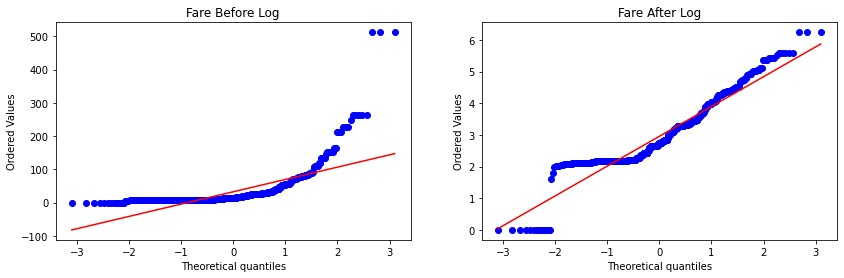

In [27]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

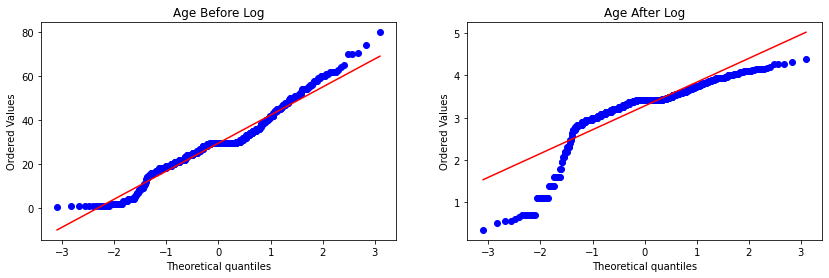

In [28]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

You can see in the aobve fig the distribution of age is degraded after log transformation is applied this is becasue the age column was aldy in noraml distribution

<hr>

## Only transformating the fare column

In [29]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [30]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [31]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6599625468164794


## Applying idfferent transformations

In [42]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10))*100)
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 65.89013732833958


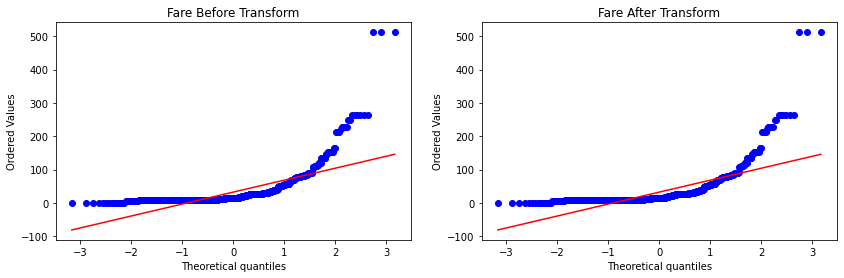

In [43]:
apply_transform(lambda x:x) # No transformation

Accuracy 64.42446941323345


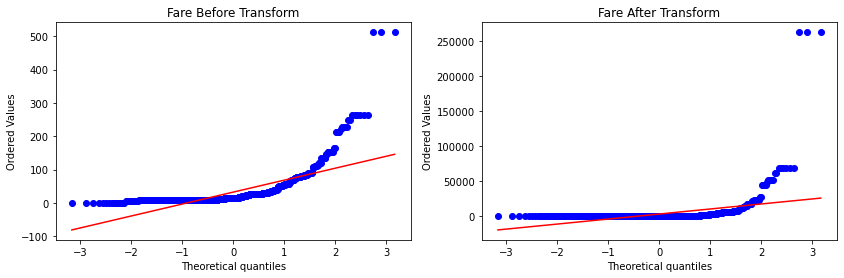

In [44]:
apply_transform(lambda x:x**2)  # Squrare transformation, the accuracy a little bit low that original

Accuracy 65.89013732833958


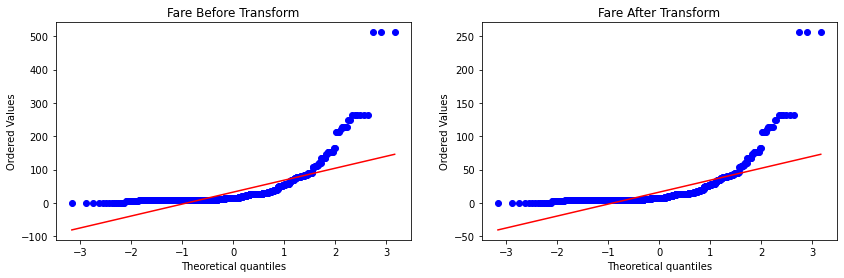

In [48]:
apply_transform(lambda x:x**1/2)  # square root transformation

Accuracy 60.156054931335824


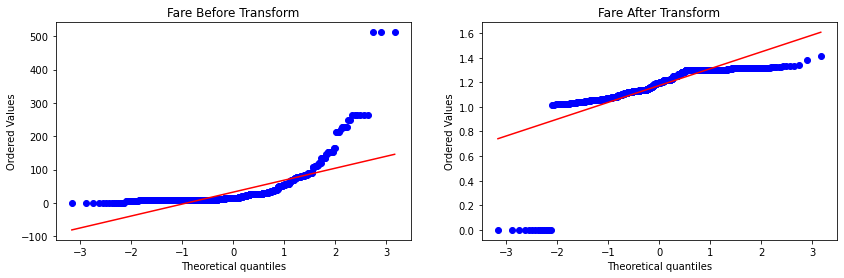

In [49]:
apply_transform(lambda x:x**1/2)  # square root transformation # reciprocal transformation, no use accuracy came down

Accuracy 61.951310861423224


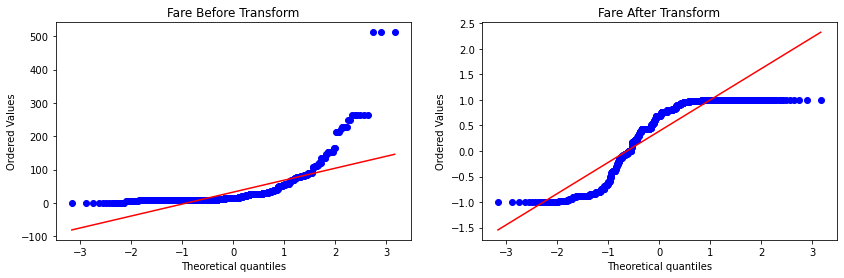

In [51]:
apply_transform(np.sin)  # you can send anything here